In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
covertype = fetch_ucirepo(id=31)
X = covertype.data.features
y = covertype.data.targets['Cover_Type'] - 1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Elevation', 'Aspect', 'Slope',
                  'Horizontal_Distance_To_Hydrology',
                  'Vertical_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways',
                  'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                  'Horizontal_Distance_To_Fire_Points']

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])  # Use same scaler

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Regularization
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,  # 20% of training data for validation
    verbose=1
)

Epoch 1/50
5811/5811 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7023 - loss: 0.7209 - val_accuracy: 0.7653 - val_loss: 0.5464
Epoch 2/50
5811/5811 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7533 - loss: 0.5707 - val_accuracy: 0.7756 - val_loss: 0.5116
Epoch 3/50
5811/5811 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7630 - loss: 0.5440 - val_accuracy: 0.7910 - val_loss: 0.4838
Epoch 4/50
5811/5811 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7720 - loss: 0.5270 - val_accuracy: 0.7954 - val_loss: 0.4725
Epoch 5/50
5811/5811 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7747 - loss: 0.5185 - val_accuracy: 0.8039 - val_loss: 0.4591
Epoch 6/50
5811/5811 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7797 - loss: 0.5097 - val_accuracy: 0.8094 - val_loss: 0.4458
Epoch 7/50
5811/5811 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7817 - loss: 0.5051 - val_accuracy: 0.8109 - val_loss: 0.4402
Epoch 8/50
5811/5811 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7853 - loss: 0

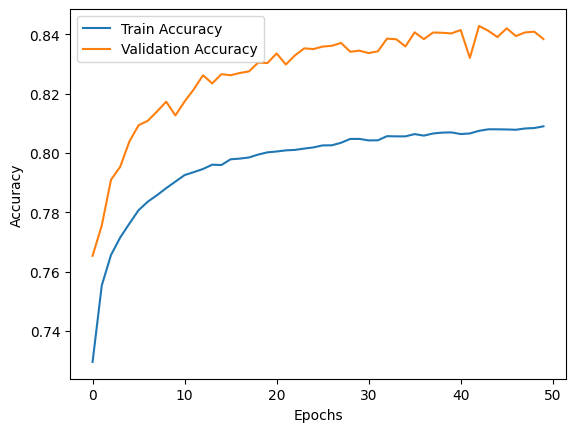

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8389


In [ ]:
# Neural Network (output is probabilities, convert to class labels)
y_pred_probs_nn = model.predict(X_test)
y_pred_nn = y_pred_probs_nn.argmax(axis=1)

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print("\nNeural Network Metrics:")
print(classification_report(y_test, y_pred_nn, target_names=[f"Class_{i+1}" for i in range(7)]))


Neural Network Metrics:
              precision    recall  f1-score   support

     Class_1       0.87      0.80      0.83     42557
     Class_2       0.83      0.91      0.87     56500
     Class_3       0.84      0.77      0.80      7121
     Class_4       0.84      0.65      0.73       526
     Class_5       0.67      0.49      0.57      1995
     Class_6       0.61      0.66      0.63      3489
     Class_7       0.92      0.74      0.82      4015

    accuracy                           0.84    116203
   macro avg       0.80      0.72      0.75    116203
weighted avg       0.84      0.84      0.84    116203



3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


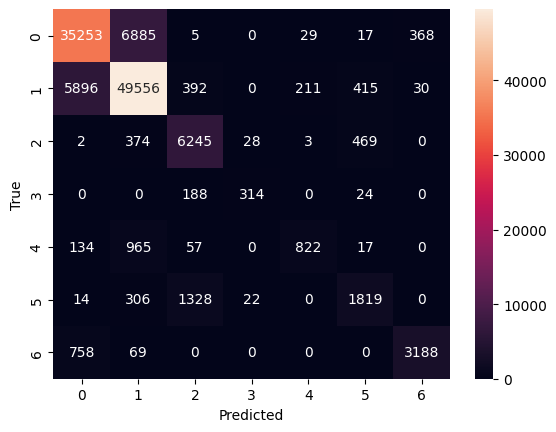

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()